Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


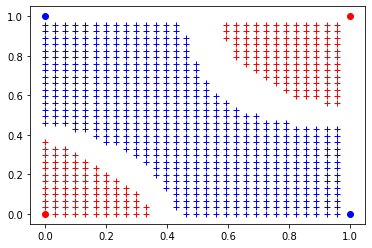

In [1]:
from pylab import rand, plot, show, norm
import numpy as np

#train data (XOR)
train_data = np.array([[0,0],[0,1],[1,0],[1,1]])
train_label = np.array([[0],[1],[1],[0]])

#train data 보기
for n in range(4):
  if train_label[n] ==1:
    plot(train_data[n][0],train_data[n][1],'ob')
  else:
    plot(train_data[n][0],train_data[n][1],'or')
# show()

from keras.models import Sequential
from keras.layers import Dense

#keras model 만들기
model = Sequential()
 
#single layer인 경우: perceptron
# model.add(Dense(1, input_dim =2, activation ='sigmoid'))

#multi layer인 경우
model.add(Dense(12, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#학습
model.fit(train_data, train_label, epochs=3000, batch_size=10, verbose=0)

#test data 만들기
test_data = np.ndarray((30*30,2), dtype=np.float32)
n=0
for x in range(30):
  for y in range(30):
    test_data[n][0] = 0.033*x
    test_data[n][1] = 0.033*y
    n=n+1

#학습된 DNN에 test data 넣고 0,1 판단하기
res = model.predict(test_data)

for n in range(30*30):
  if res[n] < 0.4:
    plot(test_data[n][0], test_data[n][1], '+r')
  elif res[n] > 0.6:
    plot(test_data[n][0], test_data[n][1], '+b')
show()